# 4.2 Demo: *melt()* To Change Wide Shape to Tall/Long  

- Datafile:  *Demo_Data_4.2_melt.csv*   


- Often used for Grouped and Stacked Bar Charts &  Multi Line Charts    
- We only need to do this if the data is not in the correct shape already!   
- If it's not, we use the *melt()* function to change its shape -- without changing the actual data values.  
- The shape plotly express wants is called **Tall/Long**   
- The data is currently in a **Wide** shape  
- We will use the pandas *melt()* function to reshape it from Wide to Tall so that we can plot it.  


- This is a part of being "Tidy" Data: (https://vita.had.co.nz/papers/tidy-data.pdf)  



In [2]:
import pandas as pd
import plotly.express as px

### Read Data file  


In [3]:
df = pd.read_csv("Data/Durable_Goods.csv")

print(df.shape)
df

(11, 10)


Durable_Goods   2008   2009   2010  \
0                                      Wood products   87.5   64.4   70.3   
1                       Nonmetallic mineral products  113.5   88.9   90.8   
2                                     Primary metals  279.6  166.0  234.1   
3                          Fabricated metal products  356.7  280.4  295.0   
4                                          Machinery  351.7  284.4  316.1   
5                   Computer and electronic products  419.7  353.4  368.7   
6   Electrical equipment, appliances, and components  126.4  101.8  108.3   
7     Motor vehicles, bodies and trailers, and parts  421.1  320.0  422.7   
8                     Other transportation equipment  270.7  250.1  248.1   
9                     Furniture and related products   77.2   59.7   57.6   
10                       Miscellaneous manufacturing  158.3  149.4  154.3   

     2011   2012   2013   2014   2015   2016  
0    70.9   78.8   89.3   96.0   98.9  104.3  
1    92.4   99.0  105.9  113.4  119.8  123.8  
2   279.9  267.6  262.1  265.3  225.9  210.1  
3   328.1  357.2  363.5  375.9  369.3  373.4  
4   365.6  407.1  396.6  411.1  381.9  364.8  
5   376.3  379.3  379.0  380.9  382.4  400.2  
6   116.8  122.9  122.7  127.2  125.3  119.0  
7   488.8  510.8  548.1  620.4  668.3  677.0  
8   256.4  295.6  309.0  328.3  335.9  317.6  
9    60.4   66.3   69.8   72.4   78.5   79.2  
10  156.9  154.2  163.1  160.4  166.6  154.3

In [4]:
metal_to_plot = ['Primary metals', 'Fabricated metal products']

df_selected_metals = df.query("Durable_Goods in @metal_to_plot")

print(df_selected_metals.shape)
df_selected_metals.head(2)

(2, 10)


Durable_Goods   2008   2009   2010   2011   2012   2013   2014  \
2             Primary metals  279.6  166.0  234.1  279.9  267.6  262.1  265.3   
3  Fabricated metal products  356.7  280.4  295.0  328.1  357.2  363.5  375.9   

    2015   2016  
2  225.9  210.1  
3  369.3  373.4

In [5]:
#df.dtypes

# Use *melt()* to change Dataframe Shape from Wide to Tall/Long

In [6]:
df_melt = df_selected_metals.melt(id_vars=['Durable_Goods'], 
                  var_name="Year", 
                  value_name="Revenue")

print(df_melt.shape)
df_melt.head(10)

(18, 3)


Durable_Goods  Year  Revenue
0             Primary metals  2008    279.6
1  Fabricated metal products  2008    356.7
2             Primary metals  2009    166.0
3  Fabricated metal products  2009    280.4
4             Primary metals  2010    234.1
5  Fabricated metal products  2010    295.0
6             Primary metals  2011    279.9
7  Fabricated metal products  2011    328.1
8             Primary metals  2012    267.6
9  Fabricated metal products  2012    357.2

# Plot

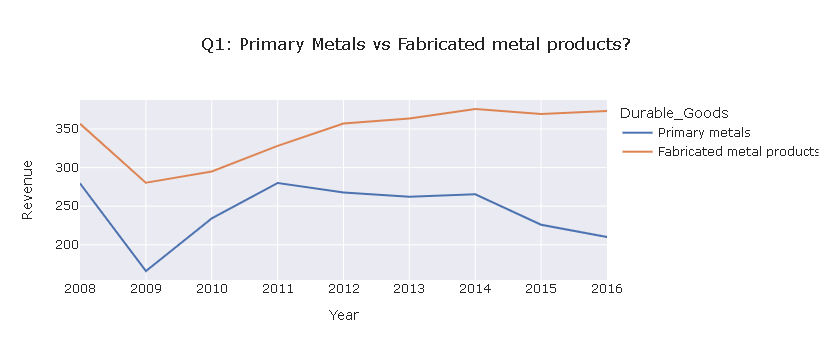

In [7]:
fig = px.line(df_melt, 
             x='Year', 
             y='Revenue',
             color = 'Durable_Goods', 
             template='seaborn',
             title='Q1: Primary Metals vs Fabricated metal products?')

fig.show()

In [8]:
fig = px.line(df_melt, 
             x='Month', 
             y='Sales',
             color = 'ShoeType',
             template='seaborn',
             title='Multi-Line Chart - After melt()'
             )

fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Durable_Goods', 'Year', 'Revenue'] but received: Month